## 3. Customising plots

In the previous section, we explored the convenient `quickplot` function, which allows you to visualise complex datasets with a single line of code. However, while `quickplot` is a fast and efficient method for quickly previewing data, its minimal API does not easily support highly customised plots with user-defined layouts, styles, and layers.

In this section, we will delve into the fundamental components of **earthkit-plots** figures and learn how to construct a plot from scratch. Although the API remains high-level, it provides flexibility for more detailed customisation.

### The `Map` class

Plotting geospatial data in **earthkit-plots** is centred around the `Map` class. This class provides various methods to efficiently visualise geospatial data with different styles and configurations.

#### Loading Sample Data

First, let’s load the ERA5 dataset used in the previous example and construct a basic map from scratch.

In [1]:
import earthkit as ek
    
temperature, pressure = ek.data.from_source("sample", "era5-2t-msl-1985122512.grib")

#### Creating a `Map`

The Map class provides various methods for plotting and enhancing visualisations. Below is an example of how to create a map and overlay different data layers.

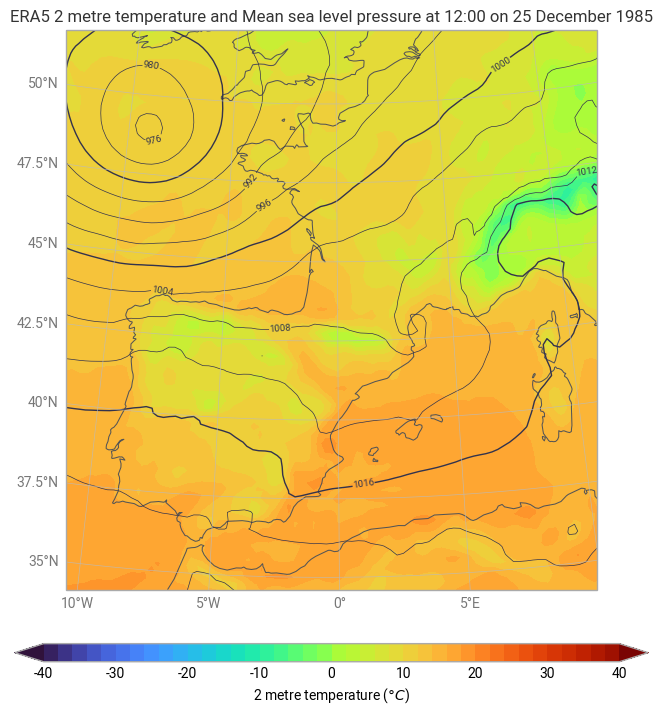

In [2]:
chart = ek.plots.Map(domain=["France", "Spain"])

chart.quickplot(temperature, units="celsius")
chart.quickplot(pressure, units="hPa")

chart.legend(label="{variable_name} ({units})")

chart.title("ERA5 {variable_name} at {time:%H:%M on %-d %B %Y}")

chart.coastlines()
chart.gridlines()

chart.show()

### The `Figure` class


In [3]:
data = ek.data.from_source("url", "https://get.ecmwf.int/repository/test-data/metview/gallery/fc_msl_wg_joachim.grib")
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,msl,surface,0,20111215,0,0,fc,0,regular_ll
1,ecmf,10fg6,surface,0,20111215,0,0,fc,0,regular_ll
2,ecmf,msl,surface,0,20111215,0,6,fc,0,regular_ll
3,ecmf,10fg6,surface,0,20111215,0,0-6,fc,0,regular_ll
4,ecmf,msl,surface,0,20111215,0,12,fc,0,regular_ll
5,ecmf,10fg6,surface,0,20111215,0,6-12,fc,0,regular_ll
6,ecmf,msl,surface,0,20111215,0,18,fc,0,regular_ll
7,ecmf,10fg6,surface,0,20111215,0,12-18,fc,0,regular_ll
8,ecmf,msl,surface,0,20111215,0,24,fc,0,regular_ll
9,ecmf,10fg6,surface,0,20111215,0,18-24,fc,0,regular_ll


In the previous section, we visualised this with `quickplot`, like this:

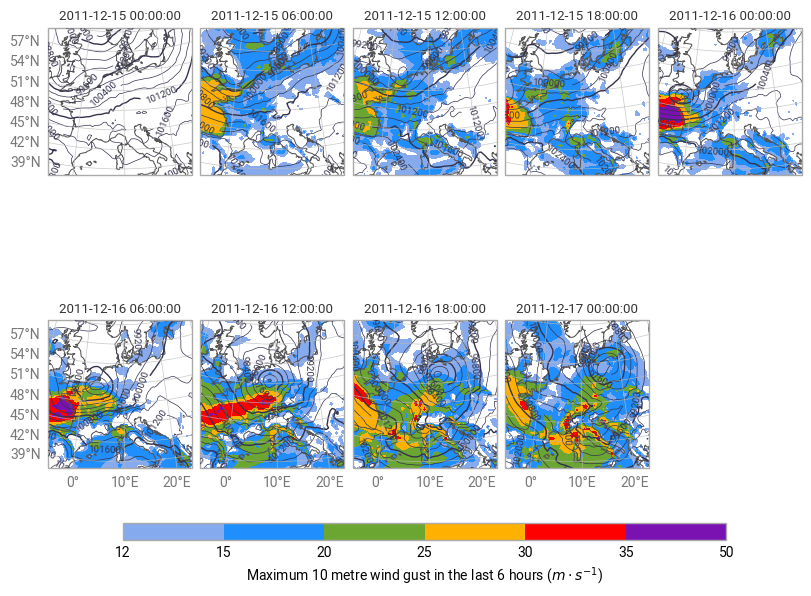

In [4]:
ek.plots.quickplot(data, domain=[-5, 23, 38, 60], groupby="valid_time").show()

This is a good way to quickly visualise the data, but the layout is not the best, and there is no overall title. For a plot like this, it makes much more sense to construct everything component-by-component.

17
17


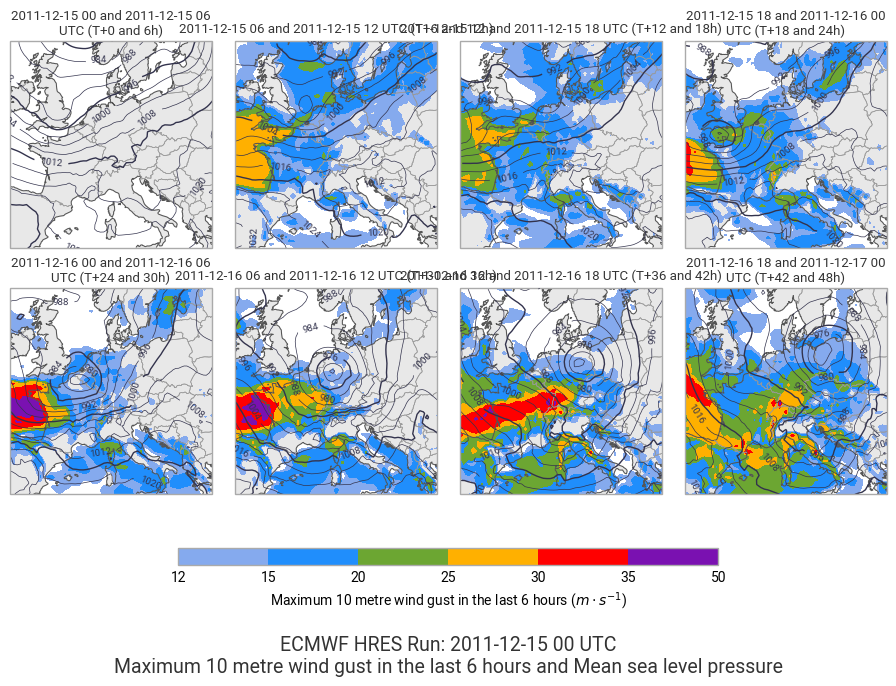

In [ ]:
import matplotlib.pyplot as plt

figure = ek.plots.Figure(
    domain=[-5, 23, 38, 60],
    size=(9, 7),
    rows=3,
    columns=4,
)

for i in range(4):
    figure.add_map(0+i//4, i%4)
# figure.add_map(2, 0, domain=["Spain", "France"])  # Map constructor options can be also passed here

print(len(data))
data = data.sel(time=slice(2, -1))
print(len(data))

# figure[4].quickplot(data.sel(shortName="10fg6")[4])
figure.quickplot(data.sel(shortName="10fg6"))
figure.quickplot(data.sel(shortName="msl"), units="hPa")

figure.land()
figure.coastlines()
figure.borders()

ax = plt.axes((0.2, 0.2, 0.6, 0.025))

figure.legend(ax=ax)

figure.subplot_titles("{time:%Y-%m-%d %H} UTC (T+{lead_time}h)")
figure.title(
    "ECMWF HRES Run: {base_time:%Y-%m-%d %H} UTC\n{variable_name}",
    fontsize=14, horizontalalignment="center", x=0.5, y=0.1,
)

figure.show()

### What's next?

In the next section we will take a closer look at how to customise and *style* plots using **earthkit-plots**.